## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [1]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)


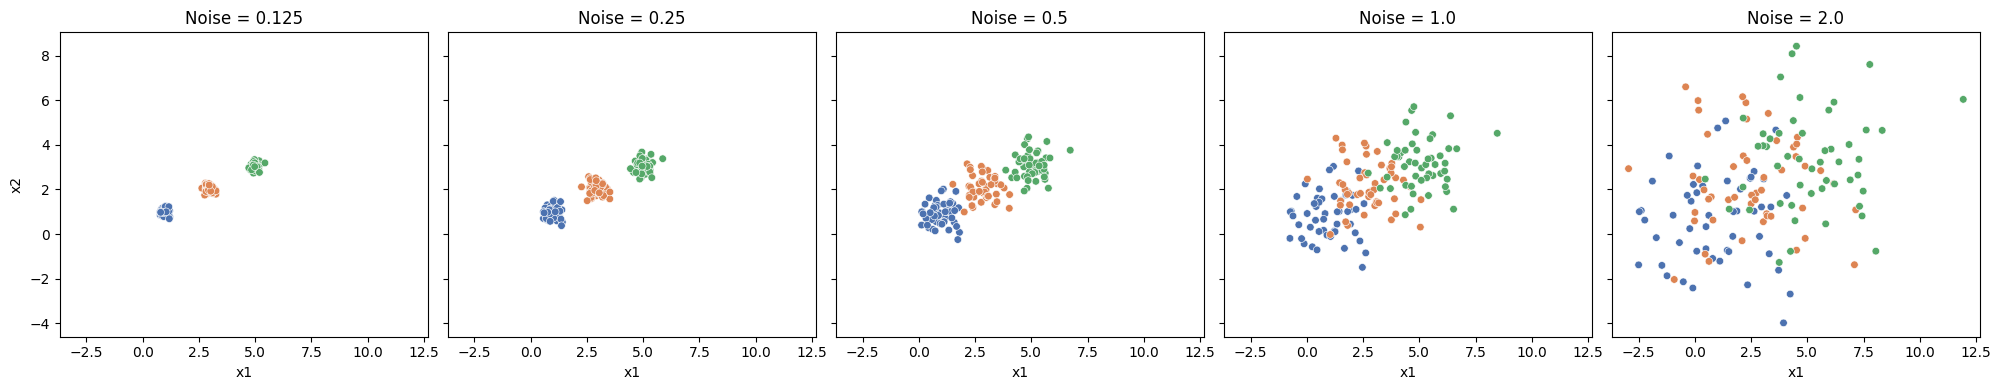

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

datasets = {'0.125': df0_125, '0.25': df0_25, '0.5': df0_5, '1.0': df1_0, '2.0': df2_0}

fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharex=True, sharey=True)
for ax, (label, df) in zip(axes, datasets.items()):
    sns.scatterplot(data=df, x='x1', y='x2', hue='group', ax=ax, palette='deep', s=30, legend=False)
    ax.set_title(f"Noise = {label}")
plt.tight_layout()
plt.show()

As noise increases, clusters overlap more and become less visually distinct. At noise = 0.125, clusters are compact and well separated. By noise = 2.0, points overlap heavily and group boundaries are nearly impossible to see.

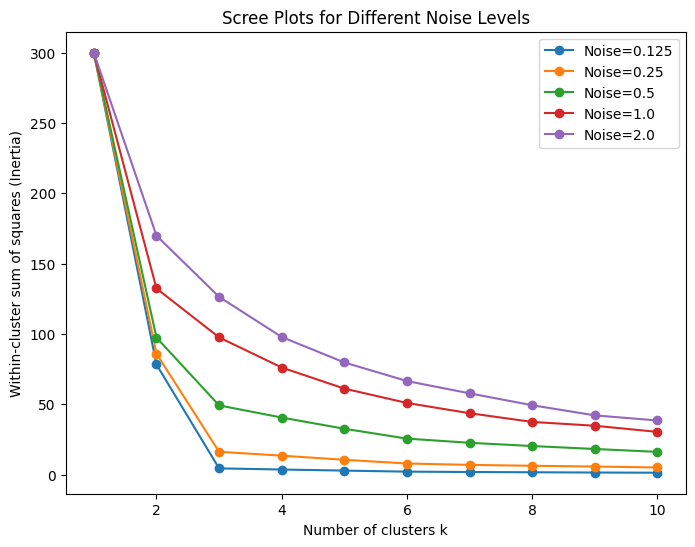

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def scree_plot(df, max_k=10):
    X = df[['x1', 'x2']].values
    X = StandardScaler().fit_transform(X)
    inertias = []
    for k in range(1, max_k+1):
        km = KMeans(n_clusters=k, n_init=10, random_state=42)
        km.fit(X)
        inertias.append(km.inertia_)
    return inertias

plt.figure(figsize=(8,6))
for label, df in datasets.items():
    inertias = scree_plot(df)
    plt.plot(range(1, 11), inertias, marker='o', label=f"Noise={label}")
plt.xlabel('Number of clusters k')
plt.ylabel('Within-cluster sum of squares (Inertia)')
plt.title('Scree Plots for Different Noise Levels')
plt.legend()
plt.show()

For low noise values there is a very sharp elbow at k=3 which makes it easy to pick k. For moderate noise (0.5–1.0) the elbow flattens slightly, but k=3 still is still visible. High noise (2.0) the curve becomes smooth, making the elbow unclear which in turn makes selecting k ambiguous.

The elbow shows where adding more clusters stops giving a large drop in within-cluster variance. At low noise, variance drops steeply until k=3 (true number of clusters), then levels off. At high noise, variance keeps dropping gradually, since points are more spread and extra clusters still reduce within-cluster distance as no clear knee emerges.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?

In [15]:
import pandas as pd

df = pd.read_csv('./data/SIPRI Military Expenditure Database.csv')

df_2020 = df[df['Year'] == 2020]

df_2020_clean = df_2020.dropna()

print(df_2020_clean.shape) 

print(df_2020_clean.dtypes)

(148, 7)
index                               int64
Year                                int64
Country                            object
Spending (2020 USD)               float64
Percent of GDP                    float64
Percent of Government Spending    float64
Spending per Capita               float64
dtype: object


In [6]:
cols_to_clean = ['Spending (2020 USD)', 'Spending per Capita',
                 'Percent of Government Spending', 'Percent of GDP']

for col in cols_to_clean:
    df_2020_clean.loc[:, col] = df_2020_clean[col].replace('[\$,]', '', regex=True).astype(float)

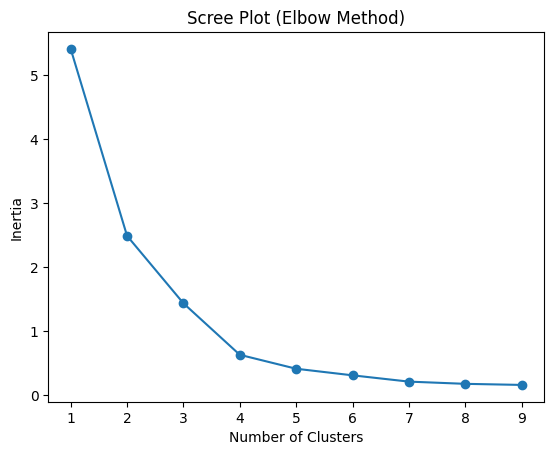

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

scaler = MinMaxScaler()
df_2020_norm = df_2020_clean.copy()
df_2020_norm[['Spending (2020 USD)', 'Spending per Capita']] = scaler.fit_transform(
    df_2020_clean[['Spending (2020 USD)', 'Spending per Capita']]
)

inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_2020_norm[['Spending (2020 USD)', 'Spending per Capita']])
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.title('Scree Plot (Elbow Method)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

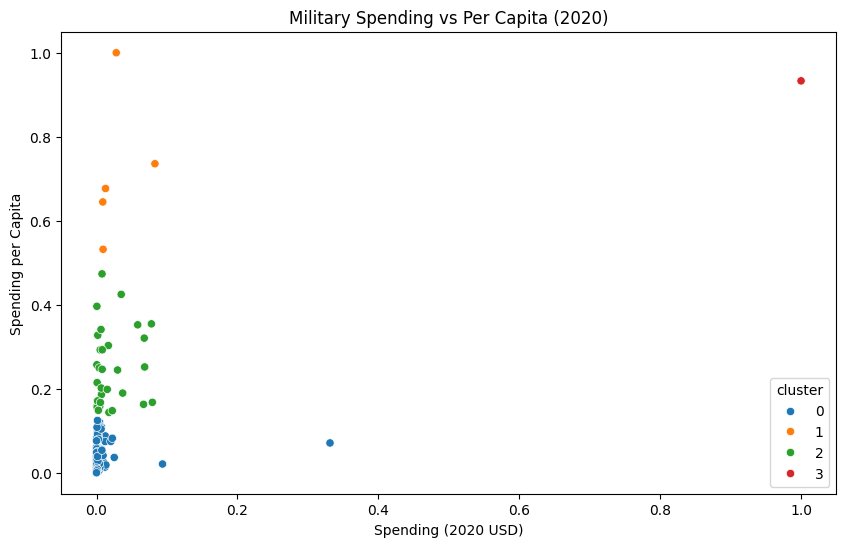

        Spending (2020 USD)                                              \
                      count           mean           std            min   
cluster                                                                   
0                     111.0    4859.185065  25405.739131       8.622460   
1                       5.0   22112.892714  24492.094226    6941.042345   
2                      31.0   16723.337075  20332.987850     405.790494   
3                       1.0  778397.200000           NaN  778397.200000   

                                                                     \
                   25%            50%            75%            max   
cluster                                                               
0           130.010211     382.464677    2297.032353  257973.429834   
1          7269.880030    9978.571429   21816.569767   64558.400000   
2          2540.889086    6095.708713   25291.107306   61712.537169   
3        778397.200000  778397.200000  778397.20

In [17]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_2020_norm['cluster'] = kmeans.fit_predict(df_2020_norm[['Spending (2020 USD)', 'Spending per Capita']])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_2020_norm,
    x='Spending (2020 USD)',
    y='Spending per Capita',
    hue='cluster',
    palette='tab10'
)
plt.title('Military Spending vs Per Capita (2020)')
plt.show()

summary = df_2020_clean.copy()
summary['cluster'] = df_2020_norm['cluster']
print(summary.groupby('cluster')[['Spending (2020 USD)', 'Spending per Capita']].describe())

print(summary[summary['Country'] == 'United States of America'])

The main clusters are all in similar rabges of total spending, so it is most likely that they are clustering just by size as per-capita seems to have the most influence over determining the clusters. However, the US stands as an extreme outlier in cluster 3 by itself in the top right, showing that it spends by far the most, and spends a ton per citizen as well. 

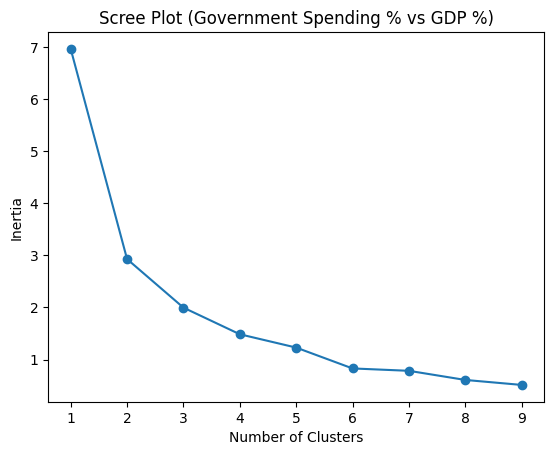

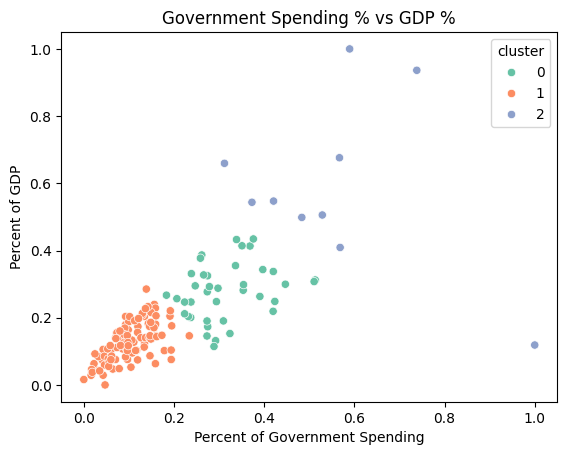

        Percent of Government Spending                                \
                                 count      mean       std       min   
cluster                                                                
0                                 39.0  0.098683  0.024125  0.059520   
1                                 99.0  0.035777  0.014549  0.004896   
2                                 10.0  0.171289  0.058725  0.097882   

                                                Percent of GDP            \
              25%       50%       75%       max          count      mean   
cluster                                                                    
0        0.082430  0.092044  0.112633  0.157918           39.0  0.027412   
1        0.025921  0.034261  0.047402  0.074624           99.0  0.012664   
2        0.135010  0.168248  0.179081  0.303027           10.0  0.058071   

                                                                     
              std       min       25%   

In [16]:
df_2020_norm2 = df_2020_clean.copy()
df_2020_norm2[['Percent of Government Spending', 'Percent of GDP']] = scaler.fit_transform(
    df_2020_clean[['Percent of Government Spending', 'Percent of GDP']]
)

inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_2020_norm2[['Percent of Government Spending', 'Percent of GDP']])
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.title('Scree Plot (Government Spending % vs GDP %)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
df_2020_norm2['cluster'] = kmeans.fit_predict(df_2020_norm2[['Percent of Government Spending', 'Percent of GDP']])

sns.scatterplot(
    data=df_2020_norm2,
    x='Percent of Government Spending',
    y='Percent of GDP',
    hue='cluster',
    palette='Set2'
)
plt.title('Government Spending % vs GDP %')
plt.show()

summary2 = df_2020_clean.copy()
summary2['cluster'] = df_2020_norm2['cluster']
print(summary2.groupby('cluster')[['Percent of Government Spending', 'Percent of GDP']].describe())

print(summary2[summary2['Country'] == 'United States of America'])

This clustering seems to divide into countries that don't prioritize military spending with cluster 1, countries that prioritize defense but don't overspend relative to their GDPs in cluster 0, and cluster 2 has countries that overspend on military, that use a high amount of government budget to spend a lot relative to their GDP. What is interesting is the US is in cluster 1, which even though they are spending an incredibly high amount, relative to the economic output of the country it is proportional to other nations.  

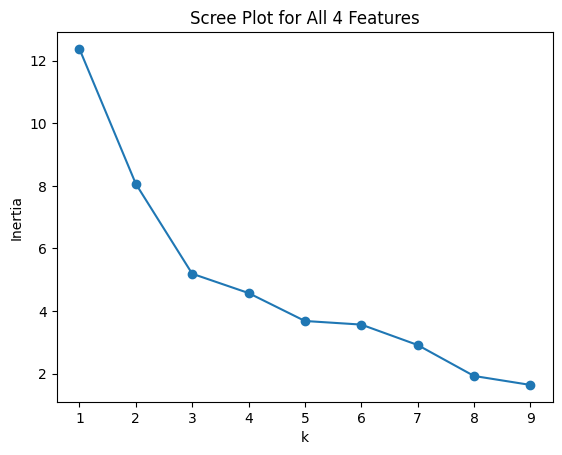

        Spending (2020 USD)                                             \
                      count           mean            std          min   
cluster                                                                  
0                      31.0    5221.489510   13409.350931    23.306688   
1                       6.0  147964.582042  309635.189564  6095.708713   
2                      16.0    9124.465028   17890.859122   298.382192   
3                      95.0    7906.416291   28508.587970     8.622460   

                                                                 \
                 25%           50%           75%            max   
cluster                                                           
0         222.631240    934.311154   4922.188075   72937.064048   
1        7700.424616  15897.570598  53872.942442  778397.200000   
2         623.936771   1988.654264   6050.286655   61712.537169   
3         121.641398    567.650747   4195.258179  257973.429834   

        Spe

In [18]:

features = ['Spending (2020 USD)', 'Spending per Capita',
            'Percent of Government Spending', 'Percent of GDP']

df_all_norm = df_2020_clean.copy()
df_all_norm[features] = scaler.fit_transform(df_2020_clean[features])

inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_all_norm[features])
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.title('Scree Plot for All 4 Features')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42)
df_all_norm['cluster'] = kmeans.fit_predict(df_all_norm[features])
summary_all = df_2020_clean.copy()
summary_all['cluster'] = df_all_norm['cluster']
print(summary_all.groupby('cluster')[features].describe())

print(summary_all[summary_all['Country'] == 'United States of America'])

4. Cluster 1 contains a small group of countries, including the United States, that spend exceptionally high amounts both in total and per capita, though their defense budgets represent a moderate share of their overall economy due to their large GDPs. Cluster 2 includes countries that may not spend as much overall but dedicate a significant portion of their national budgets to the military, suggesting a higher defense priority. Cluster 0 comprises mid-level spenders with moderate per capita costs and proportional commitments, likely representing emerging economies. Cluster 3, the largest, includes nations with low military spending both in absolute and proportional terms, which are probably smaller or less militarized states. The U.S. stands out as a global outlier in total expenditure while maintaining relatively moderate proportional indicators. Compared to the earlier clustering using just two features, the 4-variable clustering more clearly separates outliers like the United States into their own group. While the 2D clusterings grouped the U.S. with other high spenders, the 4D version captures both the scale and proportion of spending, giving a more complete picture of national defense strategies.

5. The k-means algorithm revealed patterns that segmented countries not only by economic scale but also by differing national defense strategies. It distinguished between nations that spend heavily in total versus those that dedicate a large share of their GDP or government budget to the military. This allowed for a better understanding of how countries prioritize defense, revealing differences in strategy that aren’t apparent from the raw spending figures.